# Set Up
Considering that the overall process may take a long time and Colab execution may be interrupted, we highly recommend mounting your Google Drive to Colab to save intermediate process data.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Clone private GitHub repo

Use this section to load the repository before the paper is published. This private model is designed for the **testing** and **reviewing** process. To access the repository, you need to request key pairs by emailing the authors at jinyin@uw.edu or juhuah@uw.edu. Once the work is accepted and published, all the data and code will be made publicly available to all researchers.

Before running the following code:

1. Request the private code.
2. Update to your drive.
3. Update the **PATH variable** to your own drive path.
4. The following code will copy the key files to /root/.ssh.

In [ ]:
# Remember to update this variable to your own path
BASE_PATH = "/content/drive/MyDrive/PTSM_Private_Testing"

# Create the .ssh directory if it doesn't exist and copy all id_rsa files from the specified path to /root/.ssh/
!mkdir -p ~/.ssh
!cp {BASE_PATH}/id_rsa* ~/.ssh/
!ssh-keyscan github.com >> ~/.ssh/known_hosts

# Change to the specified path and clone the repository
%cd {BASE_PATH}
!git clone git@github.com:bettyJin/Post_Traumatic_Sepsis_MIMICIII.git
%cd {BASE_PATH}/Post_Traumatic_Sepsis_MIMICIII/
!ls

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
# github.com:22 SSH-2.0-babeld-107f1c11
# github.com:22 SSH-2.0-babeld-107f1c11
# github.com:22 SSH-2.0-babeld-107f1c11
# github.com:22 SSH-2.0-babeld-107f1c11
# github.com:22 SSH-2.0-babeld-107f1c11
/content/drive/MyDrive/PTSM_Private_Testing
Cloning into 'Post_Traumatic_Sepsis_MIMICIII'...
remote: Enumerating objects: 199, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 199 (delta 27), reused 45 (delta 14), pack-reused 138
Receiving objects: 100% (199/199), 130.18 MiB | 10.24 MiB/s, done.
Resolving deltas: 100% (39/39), done.
/content/drive/MyDrive/PTSM_Private_Testing/Post_Tr

## Clone public GitHub repo

Use this section **after the paper is published.**



In [ ]:
# %cd /content/drive/MyDrive
# !git clone git@github.com:bettyJin/Post_Traumatic_Sepsis_MIMICIII.git
# %cd /content/drive/MyDrive/Post_Traumatic_Sepsis_MIMICIII

# 0. Getting Started

**Getting Access to MIMIC III**

The following section will guide you to:
1. request access to the MIMIC III data (see sections 0.1-0.2), and
2. request access to the data on Google BigQuery (see section 0.3).

If you already have access to MIMIC III on Google BigQuery, you can skip this section and jump to "**Test Access on Google BigQuery**."



Note: Ensure you use a Google account to grant access to MIMIC-III via PhysioNet (if you haven't done so already). For easier reproduction and minimal setup, our project is based on Google BigQuery and Google Colab. The project setup will run smoothly if you use the same Google account for all the following registrations: PhysioNet account, BigQuery account, and Google Colab account.

## 0.1. Be a credentialed user
Become a credentialed user on PhysioNet. This involves completion of a training course in human subjects research.
> Complete the CITI **"Data or Specimens Only Research"** course by MIT [here](https://www.citiprogram.org/index.cfm?pageID=154&icat=0&ac=0) \
* When registering, be sure to **select ‘Massachusetts Institute of Technology Affiliates’** as the organization.
* Once you have completed the modules, **save** a copy of the completion report.

> Create a PhysioNet account [here](https://physionet.org/login/?next=/settings/credentialing/).


## 0.2. Request access to MIMIC III v1.4 Data

Request access to MIMIC III v1.4 [here](https://physionet.org/content/mimiciii/1.4/).
> You may submit your saved training completion report.

> Sign the data use agreement (DUA).

More detailed tutorials for the above steps:
* [Tutorial](https://medium.com/@awlong20/getting-access-to-mimic-iii-hospital-database-for-data-science-projects-791813feb735): This article provides step-by-step instructions to get access to the MIMIC III hospital dataset.



---



After this step, you should be able to see the following page, which shows that you have access to the MIMIC III dataset.

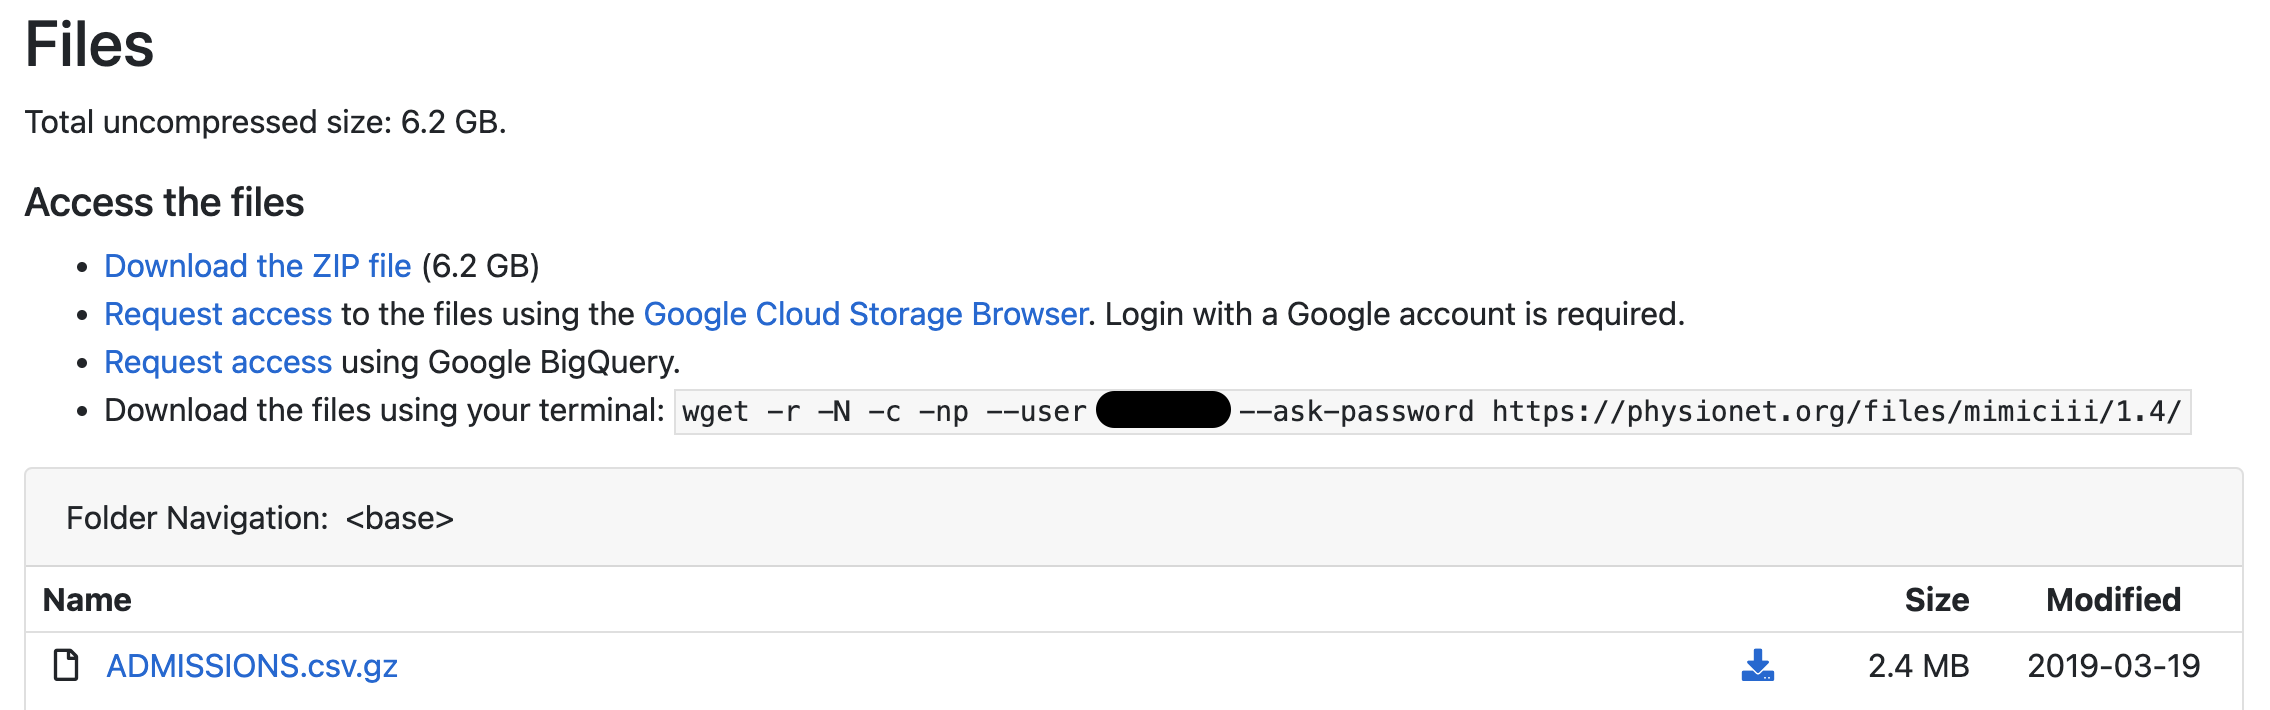

## 0.3. Request access on Google BigQuery

### Request Access
MIMIC data are available via PhysioNet in multiple ways. We chose BigQuery for its no-setup requirement, automatic updates, and precomputed derived concepts in the mimic_derived dataset.

To access the MIMIC III Database v1.4 in GCP BigQuery, **click** on the "**Request access using Google BigQuery**" button and follow the instructions in the response email. You should receive the response email very soon. If something goes wrong, more details are listed [here](https://mimic.mit.edu/docs/gettingstarted/cloud/bigquery/).(Please note that this link is based on MIMIC IV, so if you want to follow this link, you may need to pay attention to dataset differences.)


**Note**: If you haven't created a BigQuery project previously, you will be asked to do so. You will need to provide billing information to cover the cost of queries. Don't worry: the queries we run are extremely lightweight and usually cost only pennies (if that). Additionally, new customers get $300 in free credit to try Google Cloud. In our experience, this free credit was not spent at all during our past year of research.




# Test Access on Google BigQuery

You should now see several datasets listed in the sidebar on the left. If you have successfully requested access to MIMIC-III, you should see mimiciii_clinical and mimiciii_derived, along with some other datasets. We will primarily work with the mimiciii_clinical and mimiciii_derived datasets.

You are now ready to query the data! Follow these steps to test access to the dataset:

1. Create a new SQL Query.
2. Copy the following sample query into the main box (as shown in the upper right box in the image):

```
-- total number of hospital admission IDs in MIMIC III
SELECT COUNT(DISTINCT HADM_ID)
FROM `physionet-data.mimiciii_clinical.admissions`
```
3. Click the "Run" button.

You should then see the query result as shown in the lower right box in the image.





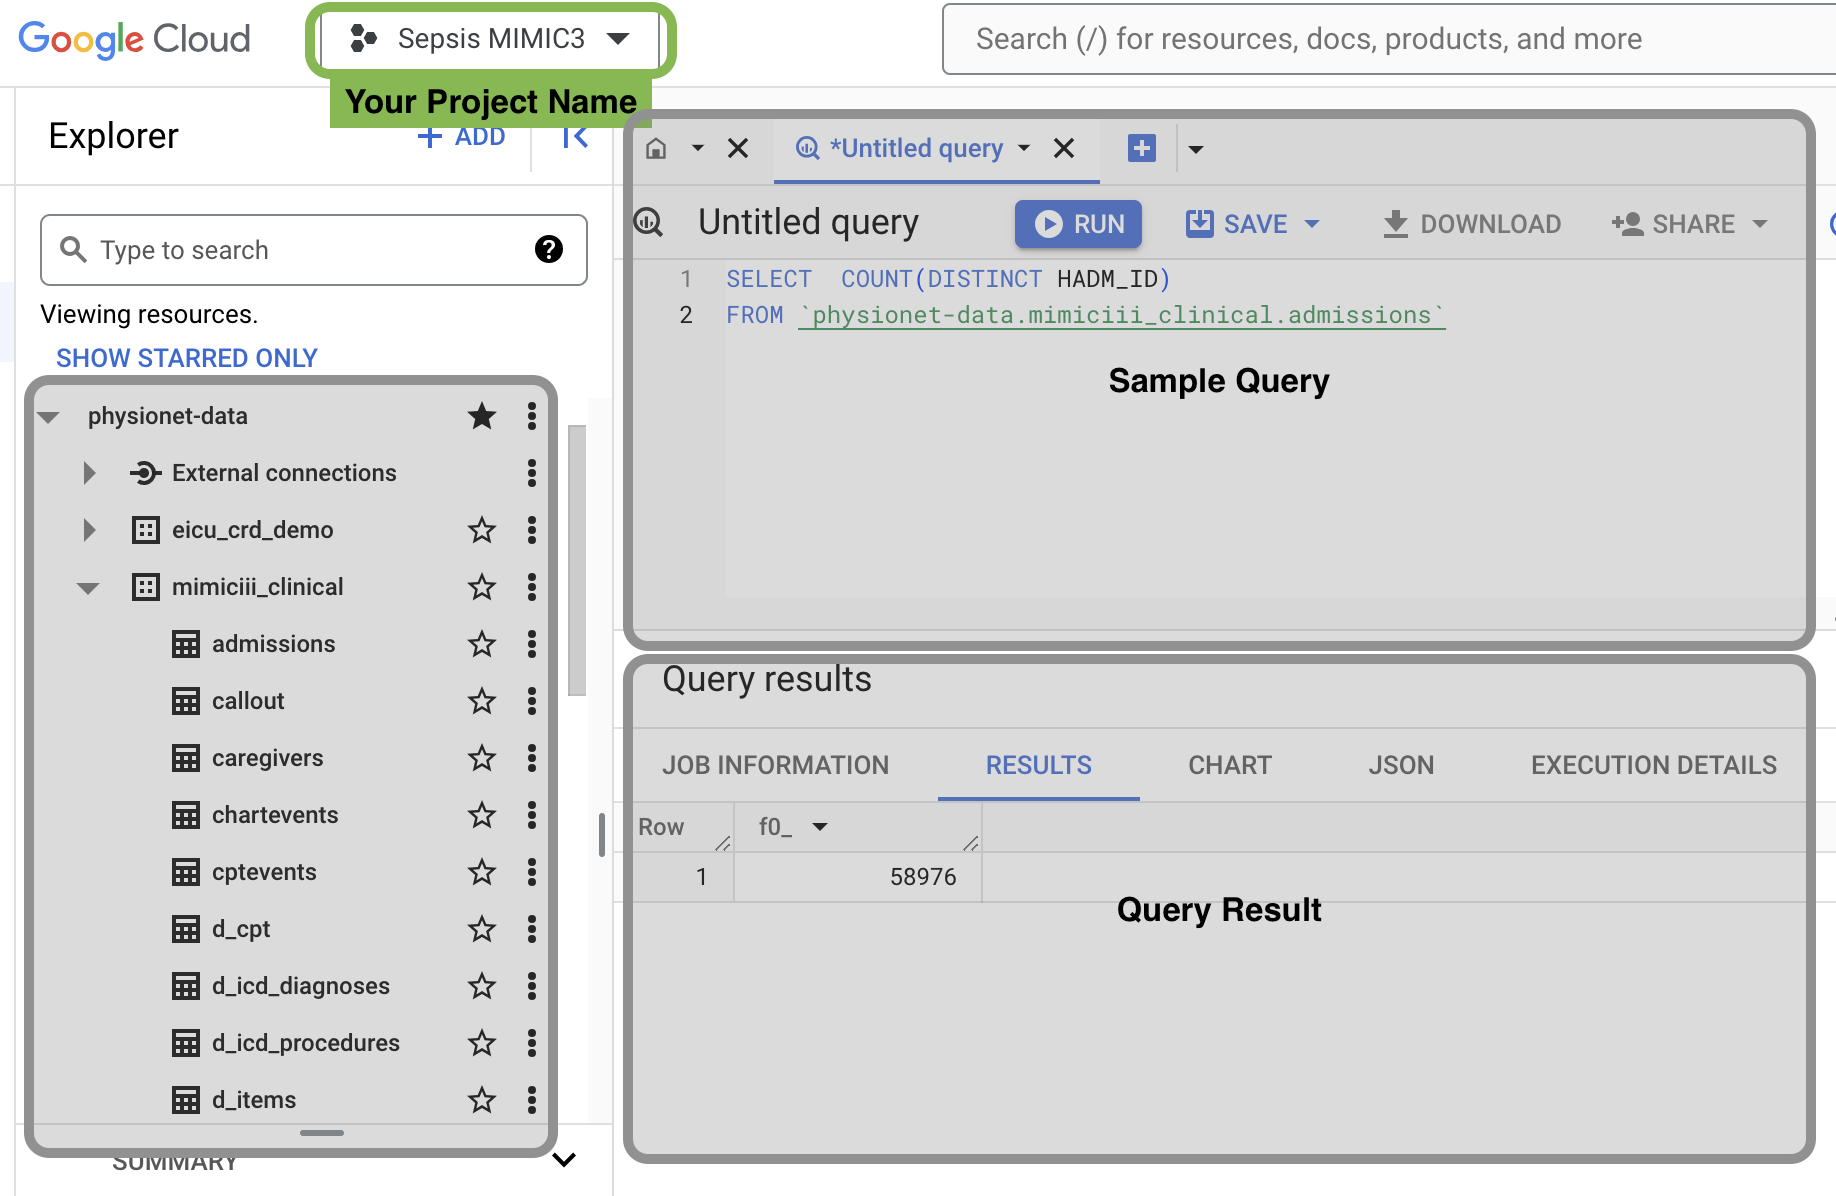

Before the final piece of configuration, we need to set the project ID in order to query the data. This project ID is used to bill usage incurred by the querying. Don't worry: the queries we run are extremely lightweight and usually cost only pennies (if that). To locate your project ID, click on your **project name** at the top left (highlighted in the **green box** in the above image). You should then see the Name column and ID column. You will need this **Project ID** for future use (its location is highlighted in an **orange box** in the below image).

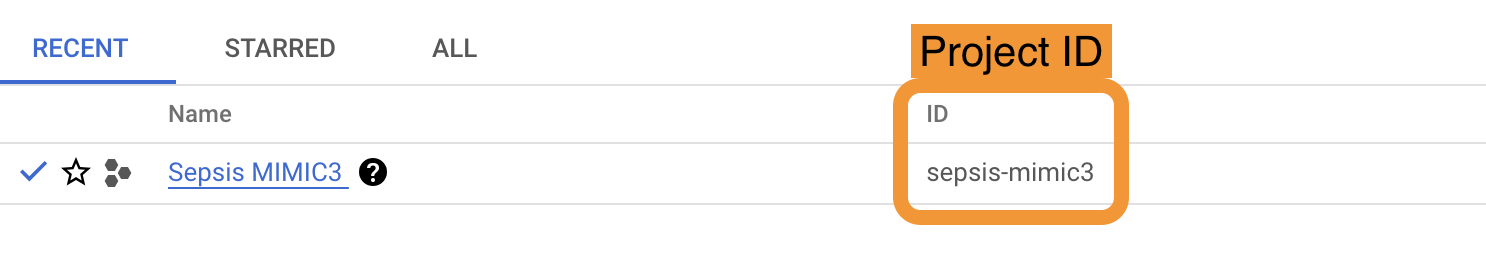

# 1. Test Access on Google Colab.

We need to authenticate this notebook with Google Cloud Platform (GCP) in order to query MIMIC-III. When prompted to login, **make sure you use the Google account granted access to MIMIC-III via PhysioNet**. [Details on granting your Google account access are described in the online documentation](https://mimic-iv.mit.edu/docs/access/cloud/).

In [ ]:
import os
import pandas as pd

# Access data using Google BigQuery.
from google.colab import auth
from google.cloud import bigquery

# authenticate
auth.authenticate_user()

The final piece of configuration involves **setting the project ID** in order to query the data. If you're not sure what your project ID is, refer to the end of the previous section "**Test Access on Google BigQuery**".

In [ ]:
# Set Your project id
project_id = 'sepsis-mimic3'
# project_id = 'CHANGE-ME'
# if project_id == 'CHANGE-ME':
#   raise ValueError('You must change project_id to your GCP project.')
os.environ["GOOGLE_CLOUD_PROJECT"] = project_id

In [ ]:
from src.data import data_utils

query = """
          -- total number of hospital admission IDs in MIMIC III
          SELECT COUNT(DISTINCT HADM_ID)
          FROM `physionet-data.mimiciii_clinical.admissions`
        """

df = data_utils.run_query(query, project_id)
df

,f0_
0,58976


## Expected Output

The purpose of the above code is to test if Google Colab can successfully access the MIMIC III data through BigQuery. If the above code box successfully runs and gets the same display result as the BigQuery console (which is a single number, **58976**, representing the total count of unique hospital admission IDs in the MIMIC III database), then this means that you are all set up and good to go.

If this block of code **runs into some error**, then here is your checklist:
1. Test your access on the Google BigQuery console (details in the section "Test Access on Google BigQuery").
2. Check your `authenticate_user()` steps. When prompted to log in, make sure you use **the Google account** granted access to MIMIC-III via PhysioNet (the account used for the BigQuery console). This step happens in the first code block of the code box in this section.
3. Check if you have set up the correct **Project ID** (details in the last part of the "Test Access on Google BigQuery" section).